**HIERARICHAL CLUSTERING** EASTWESTAIRLINES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [4]:
airline=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airline.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


EDA AND DATA PROCESSING

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airline1=airline.drop(['ID#'],axis=1)
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
airline1_norm=pd.DataFrame(normalize(airline1),columns=airline1.columns)
airline1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


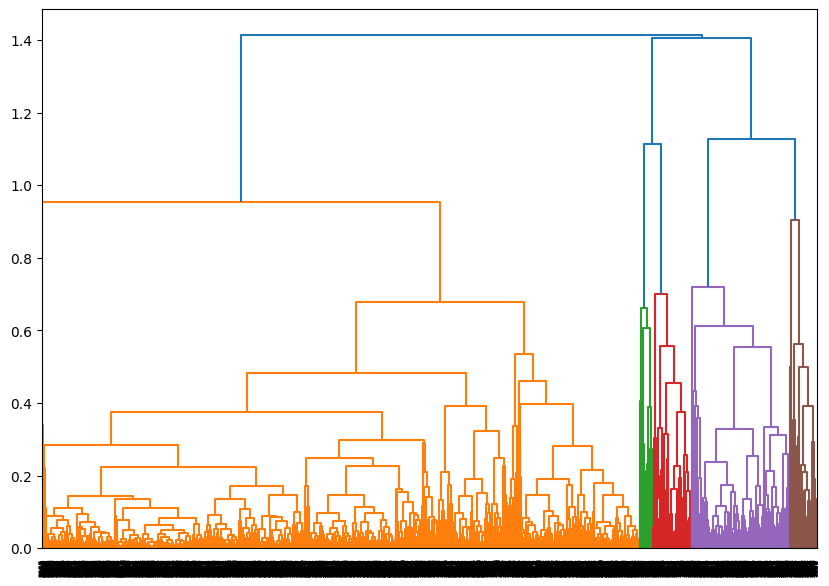

In [8]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline1_norm,'complete'))

In [9]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [10]:
y=pd.DataFrame(hclusters.fit_predict(airline1_norm),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [11]:
airline1['clustersid']=hclusters.labels_
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [12]:
airline1.groupby('clustersid').agg(['mean']).reset_index()


,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


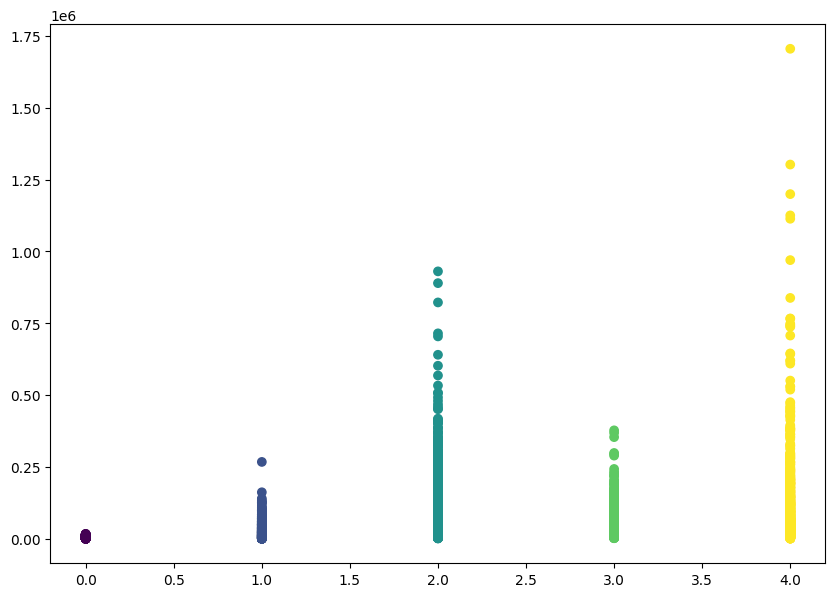

In [13]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline1['clustersid'],airline1['Balance'], c=hclusters.labels_) 

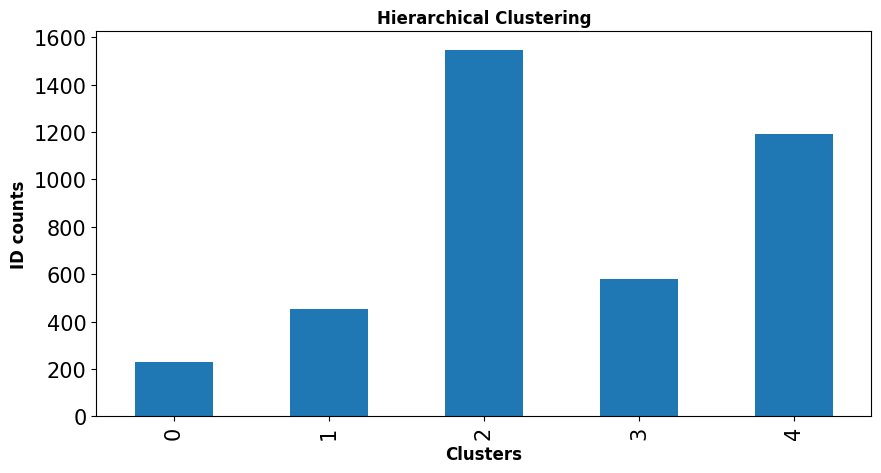

In [14]:
fif, ax = plt.subplots(figsize=(10, 5))
airline1.groupby(['clustersid']).count()['Balance'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

**K-MEANS CLUSTERING:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::**

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
airline=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [19]:
airline2_norm=StandardScaler().fit_transform(airline2)

In [20]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

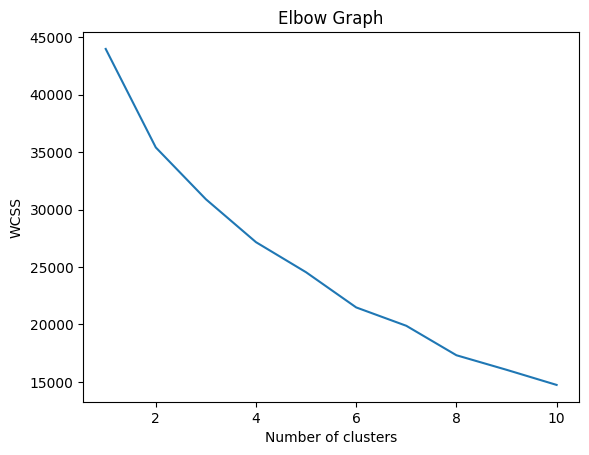

In [21]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
clusters2=KMeans(4,random_state=42).fit(airline2_norm)
clusters2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [23]:
clusters2.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [24]:
airline3=airline2.copy()
airline3['clusters2id']=clusters2.labels_
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters2id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [25]:
clusters2.cluster_centers_

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [26]:
airline3.groupby('clusters2id').agg(['mean']).reset_index()

,clusters2id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,2,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


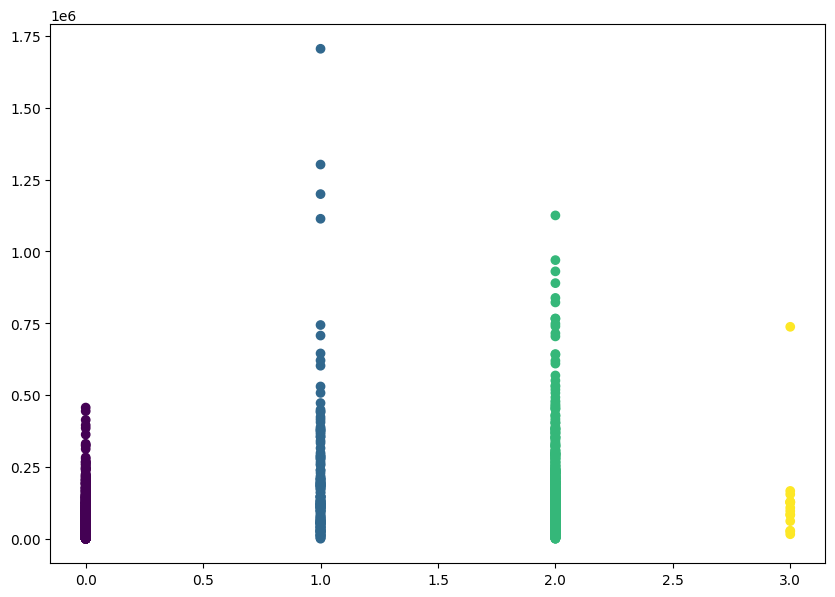

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline3['clusters2id'],airline3['Balance'], c=clusters2.labels_) 

In [28]:
#k=5
clusters3=KMeans(5,random_state=42).fit(airline2_norm)
clusters3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [29]:
clusters3.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [30]:
airline4=airline2.copy()
airline4['clusters3id']=clusters3.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters3id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [31]:
clusters3.cluster_centers_

array([[ 1.13984539,  1.05672065,  0.09776869, -0.09824189, -0.06276658,
         0.57151541,  1.51103346,  3.44127553,  3.6610428 ,  0.27107706,
         0.88975067],
       [-0.29035586, -0.05818754, -0.59651518, -0.09824189, -0.06074586,
        -0.51420592, -0.49040819, -0.18783605, -0.19980876, -0.20213465,
        -0.34539972],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.43260424, -0.01954084,  1.22083157, -0.09824189, -0.05447771,
         0.94096329,  0.75568144, -0.09151819, -0.10212979,  0.37689814,
         0.58013031],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [32]:
airline4.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
1,1,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


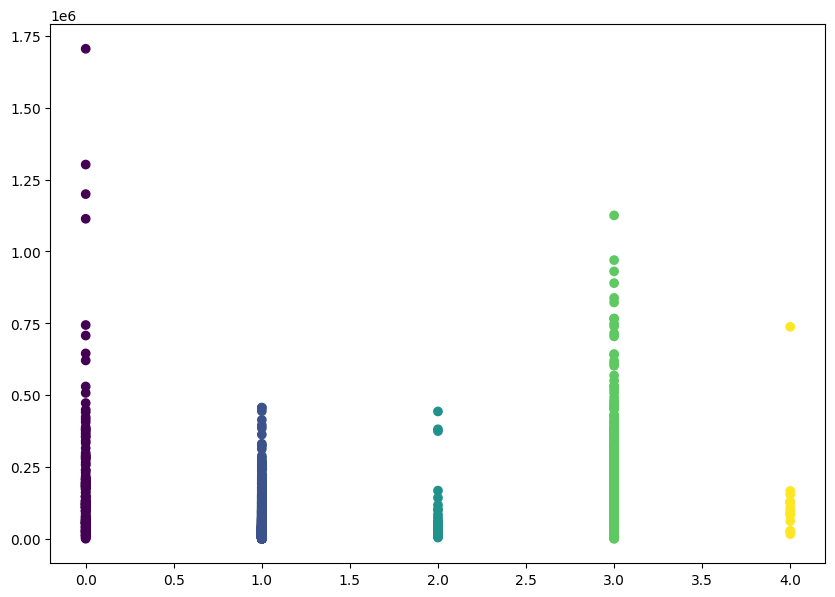

In [33]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline4['clusters3id'],airline4['Balance'], c=clusters3.labels_)

**DBSCAN:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::**

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [43]:
scaler1=MinMaxScaler()
scaler2=StandardScaler()

In [45]:
scaler1_df = scaler1.fit_transform(airline)
scaler1_df

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [46]:
scaler1_df = scaler1.fit_transform(airline)
scaler1_df

scaler2_df = scaler2.fit_transform(airline)
scaler2_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [37]:
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)


DBSCAN(eps=1, min_samples=12)

In [38]:
dbscan.labels_


array([0, 0, 0, ..., 1, 0, 0])

In [39]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [40]:
# for epsilon = 0.8
dbscan1= DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)



0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4701970394742716


In [42]:
# for epsilon = 0.6
dbscan2= DBSCAN(eps=0.6, min_samples=12)
dbscan2.fit(scaler1_df)

y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)


0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4701970394742716


In [49]:
airline['clusterid_DBSCAN'] = dbscan1.labels_
airline1['clusterid_DBSCAN'] = dbscan1.labels_
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [52]:
airline1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,2.653296
1,1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,2.273464


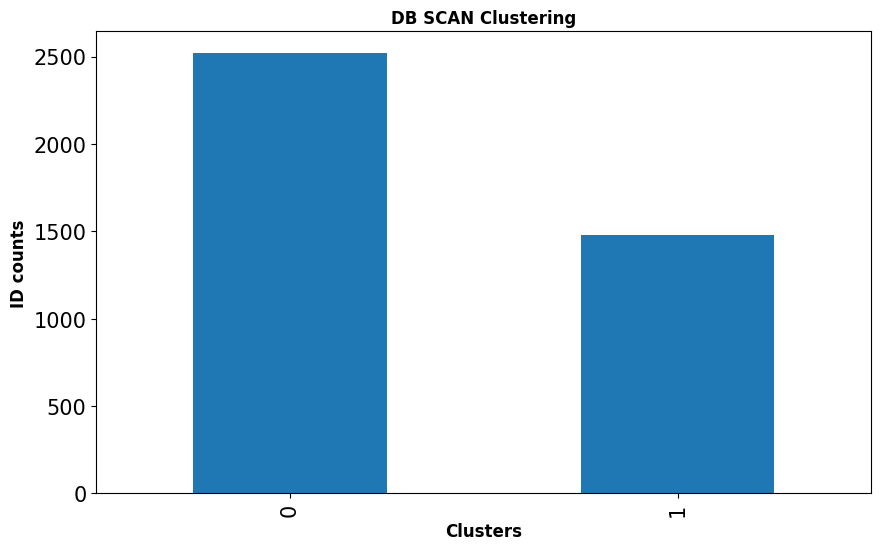

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
airline1.groupby(['clusterid_DBSCAN']).count()['Balance'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DB SCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

**OBSERVATION**

*  As decided need to focous on first two clusters.. Considering past Award status(0 or 1) cluster number2 shows award avg as 1 that means people awarded with scheme. Similarly for cluster number 2 award avg. is 0. Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bonus points & different card transaction bonus.  







**CONCLUSION**


1.   I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
2.  Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively. 

*   By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
*   KMeans clustering is sensitive to outliers



